# Workshop Task - Training models and preprocessing


We have classification problem where we have to predict whether a credit would be approved or not for a client.


|Field Name|	Order|	Type (Format)|Description|
| -------| -------|-----------|---------|
|checking_status|	1|	string (default)|Status of existing checking account, in Deutsche Mark.|	
|duration	|2|	number (default)	|Duration in months|
|credit_history	|3|	string (default)	|Credit history (credits taken, paid back duly, delays, critical accounts)|
|purpose	|4|	string (default)	|Purpose of the credit (car, television,…)|
|credit_amount	|5|	number (default)	|Credit amount|
|savings_status	|6|	string (default)	|Status of savings account/bonds, in Deutsche Mark.|
|employment	|7|	string (default)	|Present employment, in number of years.|
|installment_commitment	|8|	number (default)|Installment rate in percentage of disposable income|	
|personal_status	|9|	string (default)|Personal status (married, single,…) and sex|
|other_parties	|10|	string (default)|Other debtors / guarantors|	
|residence_since	|11|	number (default)|Present residence since X years|	
|property_magnitude	|12|	string (default)|Property (e.g. real estate)|	
|age	|13|	number (default)	|Age in years|
|other_payment_plans	|14|	string (default)|Other installment plans (banks, stores)|
|housing	|15|	string (default)	|Housing (rent, own,…)|
|existing_credits	|16|	number (default)|Number of existing credits at this bank|	
|job	|17|	string (default)	|Job|
|num_dependents	|18|	number (default)|Number of people being liable to provide maintenance for|	
|own_telephone	|19|	string (default)|Telephone (yes,no)|	
|foreign_worker	|20|	string (default)|Foreign worker (yes,no)|	
accepted	|21|	string (default)	|Class|


Your task is to : 
  1. Use some EDA techniques we learned this week   
  2. Using Univariate variable analysis, detect what is wrong with the following features : 
      - change_purpose
      - change_duration
      - checking_status
      - personal_status  
    Hint : use dataframe['feature'].unique()
  3. Fix the problems on the features above 
      - hint : Use df.replace from pandas, and df.apply
  4. Detect skewed distribution on a numeric variable :
      - Use log/sqrt transformation on at least one variable with skewed distribution
      - hint : use np.log() or np.sqrt()
  5. Detect missing values and handle them
      * Warning : there are 2 missing type of values
      * hint : dataset = dataset.replace('missing_value', np.nan)

  6. Use Catboost Encoding (Count Encoding, Target Encoding) and compare the performance with One-Hot Encoding
  
  7. Scale the numeric data (some of them)
  
  8. Make train/test split : with train(70%), test(30%) with random_state = 0

  9. Train the model
  
  10. Evaluate the model
  
  11. Achieve accuracy on test set >=0.90
  
  12. For reproducibility please use random_state on train_test_split and model initialization
  
  13. Write a summary :
    - Which model gives the best result?
    - What can we improve in the future?
    - Which encoding give better performance on this dataset (CatBoost or One-Hot)?
    
Bonus points : 
* Add precision/recall evaluation

* Hint : use:  from sklearn.metrics import classification_report

----------------------------
General Support : 
For converting feature to numeric value use :
pd.to_numeric(dataset[feature], errors='coerce')



In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd
import numpy as np

In [11]:
dataset = pd.read_csv('dataset-workshop.csv')

In [12]:
dataset.head(10)

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1
5,5,None,36,Existing_credits_paid_till_now,education,1227.203916,Unknown_or_no_savings_acct,1_to_4yrs,2,male_single,...,unknown/no_property,35.0,none,for_free,1,unskilled_resident,2,yes,yes,0
6,6,None,24,Existing_credits_paid_till_now,furniture/equipment,1985.000000,500_to_1000DM,>7yrs,3,male_single,...,building_society_savings_agreement/life_insurance,53.0,none,own,1,skilled_employee/official,1,none,yes,0
7,7,from_0_to_200,36,None,used_car,2809.000000,<100DM,1_to_4yrs,2,male_single,...,car_or_other_nonsavings,35.0,none,rent,1,management_self-employed_highly_qualified/officer,1,yes,yes,0
8,8,None,12,Existing_credits_paid_till_now,radio/television,2484.663607,>1000DM,4_to_7yrs,2,male_divorced/separated,...,real_estate,61.0,none,own,1,unskilled_resident,1,none,yes,0
9,9,from_0_to_200,30,Critical_acct_other_credits_existing,new_car,16324.000000,<100DM,unemployed,4,male_married/widowed,...,car_or_other_nonsavings,28.0,none,own,2,management_self-employed_highly_qualified/officer,1,none,yes,1


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1003 non-null   int64  
 1   checking_status         1003 non-null   object 
 2   duration                1003 non-null   object 
 3   credit_history          1003 non-null   object 
 4   purpose                 1003 non-null   object 
 5   credit_amount           1003 non-null   float64
 6   savings_status          1003 non-null   object 
 7   employment              1003 non-null   object 
 8   installment_commitment  1003 non-null   int64  
 9   personal_status         1003 non-null   object 
 10  other_parties           1003 non-null   object 
 11  residence_since         1003 non-null   int64  
 12  property_magnitude      1003 non-null   object 
 13  age                     953 non-null    float64
 14  other_payment_plans     1003 non-null   

In [14]:
dataset.isna().sum()

Unnamed: 0                 0
checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude         0
age                       50
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
accepted                   0
dtype: int64

In [15]:
dataset.drop(columns = 'Unnamed: 0',inplace=True)
dataset.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,None,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,None,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1


In [16]:
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_status,1003,7,None,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,1003,34,24,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_history,1003,6,Existing_credits_paid_till_now,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1003,12,radio/television,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,1003.0,NaN,NaN,NaN,4504.065569,3656.278869,505.0,1918.697453,3667.064141,5896.315833,27389.0
savings_status,1003,5,<100DM,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment,1003,5,1_to_4yrs,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_commitment,1003.0,NaN,NaN,NaN,2.973081,1.117933,1.0,2.0,3.0,4.0,4.0
personal_status,1003,5,male_single,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_parties,1003,3,None,910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dataset.shape 

(1003, 21)

In [18]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)


Numeric columns
credit_amount
installment_commitment
residence_since
age
existing_credits
num_dependents
accepted
----------------------------------
Category columns
checking_status
duration
credit_history
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker


In [19]:
# Categorical features
categorical_features=[]
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        categorical_features.append(column)

print(categorical_features)

['checking_status', 'duration', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


In [20]:
# Numerical features
numerical_features = []
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        numerical_features.append(column)
print(numerical_features)

['credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'accepted']


In [21]:
cat_df = dataset[categorical_features]
num_df = dataset[numerical_features]

In [22]:
cat_df.head(5)

,checking_status,duration,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,0_checking,6,Critical_acct_other_credits_existing,radio/television,Unknown_or_no_savings_acct,>7yrs,male_single,None,real_estate,none,own,skilled_employee/official,yes,yes
1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,<100DM,1_to_4yrs,female_divorced/separated/married,None,real_estate,none,own,skilled_employee/official,none,yes
2,None,12,Critical_acct_other_credits_existing,education,<100DM,4_to_7yrs,male_single,None,real_estate,none,own,unskilled_resident,none,yes
3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,<100DM,4_to_7yrs,male_single,guarantor,building_society_savings_agreement/life_insurance,none,for_free,skilled_employee/official,none,yes
4,0_checking,24,Delay_in_past,new_car,<100DM,1_to_4yrs,male_single,None,unknown/no_property,none,for_free,skilled_employee/official,none,yes


In [23]:
num_df.head(5)

,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,accepted
0,3380.000000,4,4,NaN,2,1,0
1,6940.208336,2,2,22.0,1,1,1
2,1902.370483,2,3,49.0,1,2,0
3,1097.000000,2,4,45.0,1,2,0
4,9021.266894,3,4,53.0,2,2,1


In [24]:
for cols in cat_df.columns:
    print(f'Number of unique values for: {cols}= {cat_df[cols].nunique()}')
    print(cat_df[cols].unique())
    print('----------------------------')

Number of unique values for: checking_status= 7
['0_checking' 'from_0_to_200' 'None' 'zero_checking' 'more_than_200'
 'from_zero_to_200' 'more_then_200']
----------------------------
Number of unique values for: duration= 34
['6' '48' '12' '42' '24' '36' '30' 'None' '15' '9' '10' '7' '60' '18`'
 '45' '11' '27' '8' '54' '20' '14' '33' '21' '16' '4' '47' '13' '22' '28'
 '5' '39' '26' '72' '40']
----------------------------
Number of unique values for: credit_history= 6
['Critical_acct_other_credits_existing' 'Existing_credits_paid_till_now'
 'Delay_in_past' 'None' 'No_credits_taken_or_all_paid'
 'All_credits_paid_duly']
----------------------------
Number of unique values for: purpose= 12
['radio/television' 'education' 'furniture/equipment' 'new_car' 'used_car'
 'newcar' 'business' 'usedcar' 'domestic_appliances' 'repairs' 'other'
 'retraining']
----------------------------
Number of unique values for: savings_status= 5
['Unknown_or_no_savings_acct' '<100DM' '500_to_1000DM' '>1000DM'
 '

In [25]:
# Exceptional columns having priority with the replacement
dataset['checking_status'].replace({'None':'0','0_checking':'0'}, inplace=True)
dataset['credit_history'].replace({'None':'0'}, inplace=True)
                                        
# All the other columns
for cols in dataset.columns:
    dataset[cols] = dataset[cols].replace({'None':np.nan, 'NaN':np.nan, 'none':'no'})
# for cols in cat_df.columns:
#    cat_df[cols].replace({'None':'np.NaN', 'none':'no'}, inplace=True)                                 

Credit_history I left it 0, because it's also info that the clients with None given info, don't have any defaulted loan

In [26]:
dataset['credit_history'].unique()

array(['Critical_acct_other_credits_existing',
       'Existing_credits_paid_till_now', 'Delay_in_past', '0',
       'No_credits_taken_or_all_paid', 'All_credits_paid_duly'],
      dtype=object)

In [27]:
# gi dodavam povtorno categoriskite i numerickite dataseti, za da mozam da gi izlistam so for loop samo kategoriskite
cat_df = dataset[categorical_features]
num_df = dataset[numerical_features]

In [28]:
for cols in cat_df.columns:
    print(f'Number of unique values for: {cols}= {cat_df[cols].nunique()}')
    print(cat_df[cols].unique())
    print('----------------------------')

Number of unique values for: checking_status= 6
['0' 'from_0_to_200' 'zero_checking' 'more_than_200' 'from_zero_to_200'
 'more_then_200']
----------------------------
Number of unique values for: duration= 33
['6' '48' '12' '42' '24' '36' '30' nan '15' '9' '10' '7' '60' '18`' '45'
 '11' '27' '8' '54' '20' '14' '33' '21' '16' '4' '47' '13' '22' '28' '5'
 '39' '26' '72' '40']
----------------------------
Number of unique values for: credit_history= 6
['Critical_acct_other_credits_existing' 'Existing_credits_paid_till_now'
 'Delay_in_past' '0' 'No_credits_taken_or_all_paid'
 'All_credits_paid_duly']
----------------------------
Number of unique values for: purpose= 12
['radio/television' 'education' 'furniture/equipment' 'new_car' 'used_car'
 'newcar' 'business' 'usedcar' 'domestic_appliances' 'repairs' 'other'
 'retraining']
----------------------------
Number of unique values for: savings_status= 5
['Unknown_or_no_savings_acct' '<100DM' '500_to_1000DM' '>1000DM'
 '100_to_500DM']
-------

In [29]:
dataset['age'].unique()

array([nan, 22., 49., 45., 53., 35., 61., 28., 25., 24., 60., 32., 44.,
       31., 48., 26., 36., 39., 42., 34., 63., 27., 30., 33., 37., 58.,
       23., 29., 57., 52., 50., 51., 41., 40., 66., 47., 54., 20., 21.,
       38., 46., 70., 74., 68., 43., 55., 64., 56., 75., 19., 65., 62.,
       67., 59.])

### Making the replacements where needed

In [30]:
# ['from_0_to_200' '0' 'zero_checking' 'more_than_200' 'from_zero_to_200' 'more_then_200']

dataset['checking_status'].replace({'from_0_to_200':'0 - 200', '0':'0', 'zero_checking':'0', 
'more_than_200':'>200', 'from_zero_to_200':'0 - 200', 'more_then_200':'>200'}, inplace=True)

In [31]:
dataset['checking_status'].unique()

array(['0', '0 - 200', '>200'], dtype=object)

For the feature 'checking_status', doing all the replacements, from 7 categories, we have now only 3.

In [32]:
dataset['purpose'].replace({'newcar':'new_car', 'usedcar':'used_car'}, inplace=True)

In [33]:
dataset['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'new_car',
       'used_car', 'business', 'domestic_appliances', 'repairs', 'other',
       'retraining'], dtype=object)

In [34]:
dataset['personal_status'].replace({'feemale_divorced/separated/married':'female_divorced/separated/married'}, inplace=True)

In [35]:
dataset['personal_status'].unique()

array(['male_single', 'female_divorced/separated/married',
       'male_divorced/separated', 'male_married/widowed'], dtype=object)

I would say it is not a features that can give us more info, because most of the options are included under one.

In [36]:
dataset['duration'].replace({'18`':'18'}, inplace=True)

In [37]:
dataset['duration'].unique()

array(['6', '48', '12', '42', '24', '36', '30', nan, '15', '9', '10', '7',
       '60', '18', '45', '11', '27', '8', '54', '20', '14', '33', '21',
       '16', '4', '47', '13', '22', '28', '5', '39', '26', '72', '40'],
      dtype=object)

In [38]:
dataset['duration'] = pd.to_numeric(dataset['duration'], errors='coerce')
dataset['duration'].unique()

array([ 6., 48., 12., 42., 24., 36., 30., nan, 15.,  9., 10.,  7., 60.,
       18., 45., 11., 27.,  8., 54., 20., 14., 33., 21., 16.,  4., 47.,
       13., 22., 28.,  5., 39., 26., 72., 40.])

Transformed duration feature from object to float64 in order to be more representative

In [39]:
dataset.isna().sum()

checking_status             0
duration                   53
credit_history              0
purpose                     0
credit_amount               0
savings_status              0
employment                  0
installment_commitment      0
personal_status             0
other_parties             910
residence_since             0
property_magnitude          0
age                        50
other_payment_plans         0
housing                     0
existing_credits            0
job                         0
num_dependents              0
own_telephone               0
foreign_worker              0
accepted                    0
dtype: int64

In [40]:
dataset.shape

(1003, 21)

### Filling the missing values in each feature

#### Feature 'other_parties'

In [41]:
dataset['other_parties'].unique()

array([nan, 'guarantor', 'co-applicant'], dtype=object)

In [42]:
dataset['other_parties'].replace({np.nan:'other'}, inplace=True)
dataset['other_parties'].unique()

array(['other', 'guarantor', 'co-applicant'], dtype=object)

Because the nan options might refer to none existing other party or not given information, the 'other' option was given

#### Features 'duration' and 'age'

In [43]:
dataset[(dataset.duration.isnull()) | (dataset.age.isnull())][['duration', 'age']]

,duration,age
0,6.0,NaN
11,NaN,24.0
12,NaN,22.0
33,12.0,NaN
40,30.0,NaN
...,...,...
958,30.0,NaN
961,24.0,NaN
981,24.0,NaN
986,36.0,NaN


In [44]:
dataset['duration'].unique()

array([ 6., 48., 12., 42., 24., 36., 30., nan, 15.,  9., 10.,  7., 60.,
       18., 45., 11., 27.,  8., 54., 20., 14., 33., 21., 16.,  4., 47.,
       13., 22., 28.,  5., 39., 26., 72., 40.])

In [45]:
dataset['age'].unique()

array([nan, 22., 49., 45., 53., 35., 61., 28., 25., 24., 60., 32., 44.,
       31., 48., 26., 36., 39., 42., 34., 63., 27., 30., 33., 37., 58.,
       23., 29., 57., 52., 50., 51., 41., 40., 66., 47., 54., 20., 21.,
       38., 46., 70., 74., 68., 43., 55., 64., 56., 75., 19., 65., 62.,
       67., 59.])

In [46]:
# copy the whole dataset into a new duration_df in order to be able to compare after the knn imputer changes
duration_age_df = dataset.copy()

In [47]:
# import knn imputer for filling missing values

from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors=3)

cols = ['duration','age']
duration_age_df[cols] = transformer.fit_transform(duration_age_df[cols])

In [48]:
dataset['duration'].unique()

array([ 6., 48., 12., 42., 24., 36., 30., nan, 15.,  9., 10.,  7., 60.,
       18., 45., 11., 27.,  8., 54., 20., 14., 33., 21., 16.,  4., 47.,
       13., 22., 28.,  5., 39., 26., 72., 40.])

In [49]:
indexes_duration = dataset[dataset['duration'].isnull()].index
indexes_duration

Int64Index([  11,   12,   75,   86,  142,  214,  217,  240,  278,  290,  353,
             377,  392,  395,  404,  408,  424,  448,  476,  477,  534,  540,
             546,  564,  584,  590,  600,  604,  644,  652,  670,  682,  693,
             711,  718,  738,  751,  755,  781,  792,  800,  819,  849,  851,
             876,  894,  896,  901,  906,  916,  931,  937, 1002],
           dtype='int64')

In [50]:
indexes_age = dataset[dataset['age'].isnull()].index
indexes_age

Int64Index([  0,  33,  40,  64,  71,  90, 101, 113, 131, 138, 179, 188, 252,
            268, 279, 336, 339, 342, 368, 381, 412, 418, 428, 479, 481, 501,
            566, 569, 582, 586, 634, 637, 659, 674, 686, 759, 772, 776, 797,
            826, 847, 855, 859, 876, 877, 934, 958, 961, 981, 986],
           dtype='int64')

In [51]:
duration_age_df.loc[indexes_duration]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
11,0,19.000000,Existing_credits_paid_till_now,business,8006.128514,<100DM,<1yr,3,female_divorced/separated/married,other,...,building_society_savings_agreement/life_insurance,24.000000,no,rent,1,skilled_employee/official,1,no,yes,1
12,0 - 200,30.000000,Existing_credits_paid_till_now,radio/television,3901.000000,<100DM,1_to_4yrs,1,female_divorced/separated/married,other,...,car_or_other_nonsavings,22.000000,no,own,1,skilled_employee/official,1,yes,yes,0
75,0,17.000000,Critical_acct_other_credits_existing,used_car,4963.000000,<100DM,>7yrs,4,male_single,other,...,unknown/no_property,66.000000,no,for_free,2,management_self-employed_highly_qualified/officer,1,no,yes,0
86,0 - 200,14.333333,Critical_acct_other_credits_existing,furniture/equipment,2667.929870,<100DM,<1yr,4,female_divorced/separated/married,other,...,building_society_savings_agreement/life_insurance,27.000000,no,own,2,skilled_employee/official,1,no,yes,0
142,0,14.333333,Existing_credits_paid_till_now,radio/television,3443.000000,<100DM,1_to_4yrs,3,male_single,other,...,car_or_other_nonsavings,27.000000,no,own,1,management_self-employed_highly_qualified/officer,1,no,yes,0
214,0,10.333333,Critical_acct_other_credits_existing,radio/television,5734.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,other,...,car_or_other_nonsavings,51.000000,no,own,1,skilled_employee/official,1,yes,yes,0
217,>200,20.000000,Existing_credits_paid_till_now,radio/television,3929.000000,<100DM,1_to_4yrs,2,male_single,other,...,real_estate,23.000000,no,own,1,skilled_employee/official,1,yes,yes,0
240,0,16.000000,Existing_credits_paid_till_now,new_car,7232.286867,Unknown_or_no_savings_acct,>7yrs,4,female_divorced/separated/married,other,...,car_or_other_nonsavings,29.000000,bank,own,1,skilled_employee/official,1,no,yes,1
278,0,14.000000,Existing_credits_paid_till_now,furniture/equipment,5176.000000,<100DM,<1yr,1,female_divorced/separated/married,other,...,building_society_savings_agreement/life_insurance,32.000000,no,own,1,skilled_employee/official,1,no,yes,1
290,0,9.333333,Existing_credits_paid_till_now,business,733.000000,<100DM,1_to_4yrs,2,male_married/widowed,other,...,real_estate,26.000000,no,own,1,skilled_employee/official,1,yes,no,0


In [52]:
duration_age_df.loc[indexes_age]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0,6.000000,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,other,...,real_estate,39.666667,no,own,2,skilled_employee/official,1,yes,yes,0
33,0,12.000000,Critical_acct_other_credits_existing,business,4066.385959,Unknown_or_no_savings_acct,>7yrs,4,male_single,other,...,unknown/no_property,45.000000,no,rent,1,unskilled_resident,1,no,yes,0
40,0,30.000000,Existing_credits_paid_till_now,radio/television,508.000000,500_to_1000DM,>7yrs,4,male_single,other,...,car_or_other_nonsavings,25.666667,bank,own,1,management_self-employed_highly_qualified/officer,1,no,yes,0
64,0,24.000000,Existing_credits_paid_till_now,radio/television,1696.000000,<100DM,<1yr,4,female_divorced/separated/married,other,...,building_society_savings_agreement/life_insurance,55.333333,no,own,1,skilled_employee/official,1,yes,yes,0
71,0,7.000000,Critical_acct_other_credits_existing,radio/television,647.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,other,...,building_society_savings_agreement/life_insurance,37.666667,no,rent,2,unskilled_resident,1,yes,yes,0
90,0,12.000000,Critical_acct_other_credits_existing,radio/television,2323.000000,<100DM,>7yrs,4,male_single,other,...,real_estate,45.000000,no,own,1,skilled_employee/official,1,no,yes,0
101,0 - 200,36.000000,Existing_credits_paid_till_now,radio/television,6751.000000,<100DM,4_to_7yrs,4,male_single,other,...,car_or_other_nonsavings,36.333333,no,rent,1,skilled_employee/official,1,no,yes,0
113,0,36.000000,Critical_acct_other_credits_existing,new_car,8062.399912,<100DM,1_to_4yrs,4,female_divorced/separated/married,other,...,real_estate,36.333333,stores,own,2,skilled_employee/official,1,yes,yes,1
131,0,36.000000,Delay_in_past,education,5705.000000,<100DM,1_to_4yrs,4,male_single,other,...,building_society_savings_agreement/life_insurance,36.333333,stores,own,1,skilled_employee/official,1,yes,yes,1
138,0 - 200,15.000000,Critical_acct_other_credits_existing,radio/television,1366.148385,Unknown_or_no_savings_acct,4_to_7yrs,4,male_single,guarantor,...,real_estate,41.666667,bank,own,3,skilled_employee/official,1,yes,yes,0


In [53]:
duration_age_df['duration'] = duration_age_df['duration'].astype(np.int64)
duration_age_df['age'] = duration_age_df['age'].astype(np.int64)

In [54]:
duration_age_df['duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 19, 15,  9, 10,  7, 60, 18, 45, 11, 27,
        8, 17, 54, 14, 20, 33, 21, 16,  4, 47, 13, 22, 29, 28,  5, 39, 26,
       72, 40], dtype=int64)

In [55]:
duration_age_df['age'].unique()

array([39, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       42, 34, 63, 27, 30, 33, 37, 58, 23, 29, 57, 52, 50, 55, 51, 41, 40,
       66, 47, 54, 20, 21, 38, 46, 70, 74, 68, 43, 64, 56, 75, 19, 65, 62,
       67, 59], dtype=int64)

In [56]:
# bringing back our dataset
dataset = duration_age_df.copy()
print('Changed nan duration in dataset',dataset['duration'].unique())
print('Changed nan age in dataset',dataset['age'].unique())

Changed nan duration in dataset [ 6 48 12 42 24 36 30 19 15  9 10  7 60 18 45 11 27  8 17 54 14 20 33 21
 16  4 47 13 22 29 28  5 39 26 72 40]
Changed nan age in dataset [39 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 42 34 63 27 30 33 37
 58 23 29 57 52 50 55 51 41 40 66 47 54 20 21 38 46 70 74 68 43 64 56 75
 19 65 62 67 59]


All the missing values of the feature duration and age were replaced figure given by KNNImputer

In [57]:
dataset.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
accepted                  0
dtype: int64

### Bivariate Analysis

In [58]:
cat_df = dataset[categorical_features]
num_df = dataset[numerical_features]

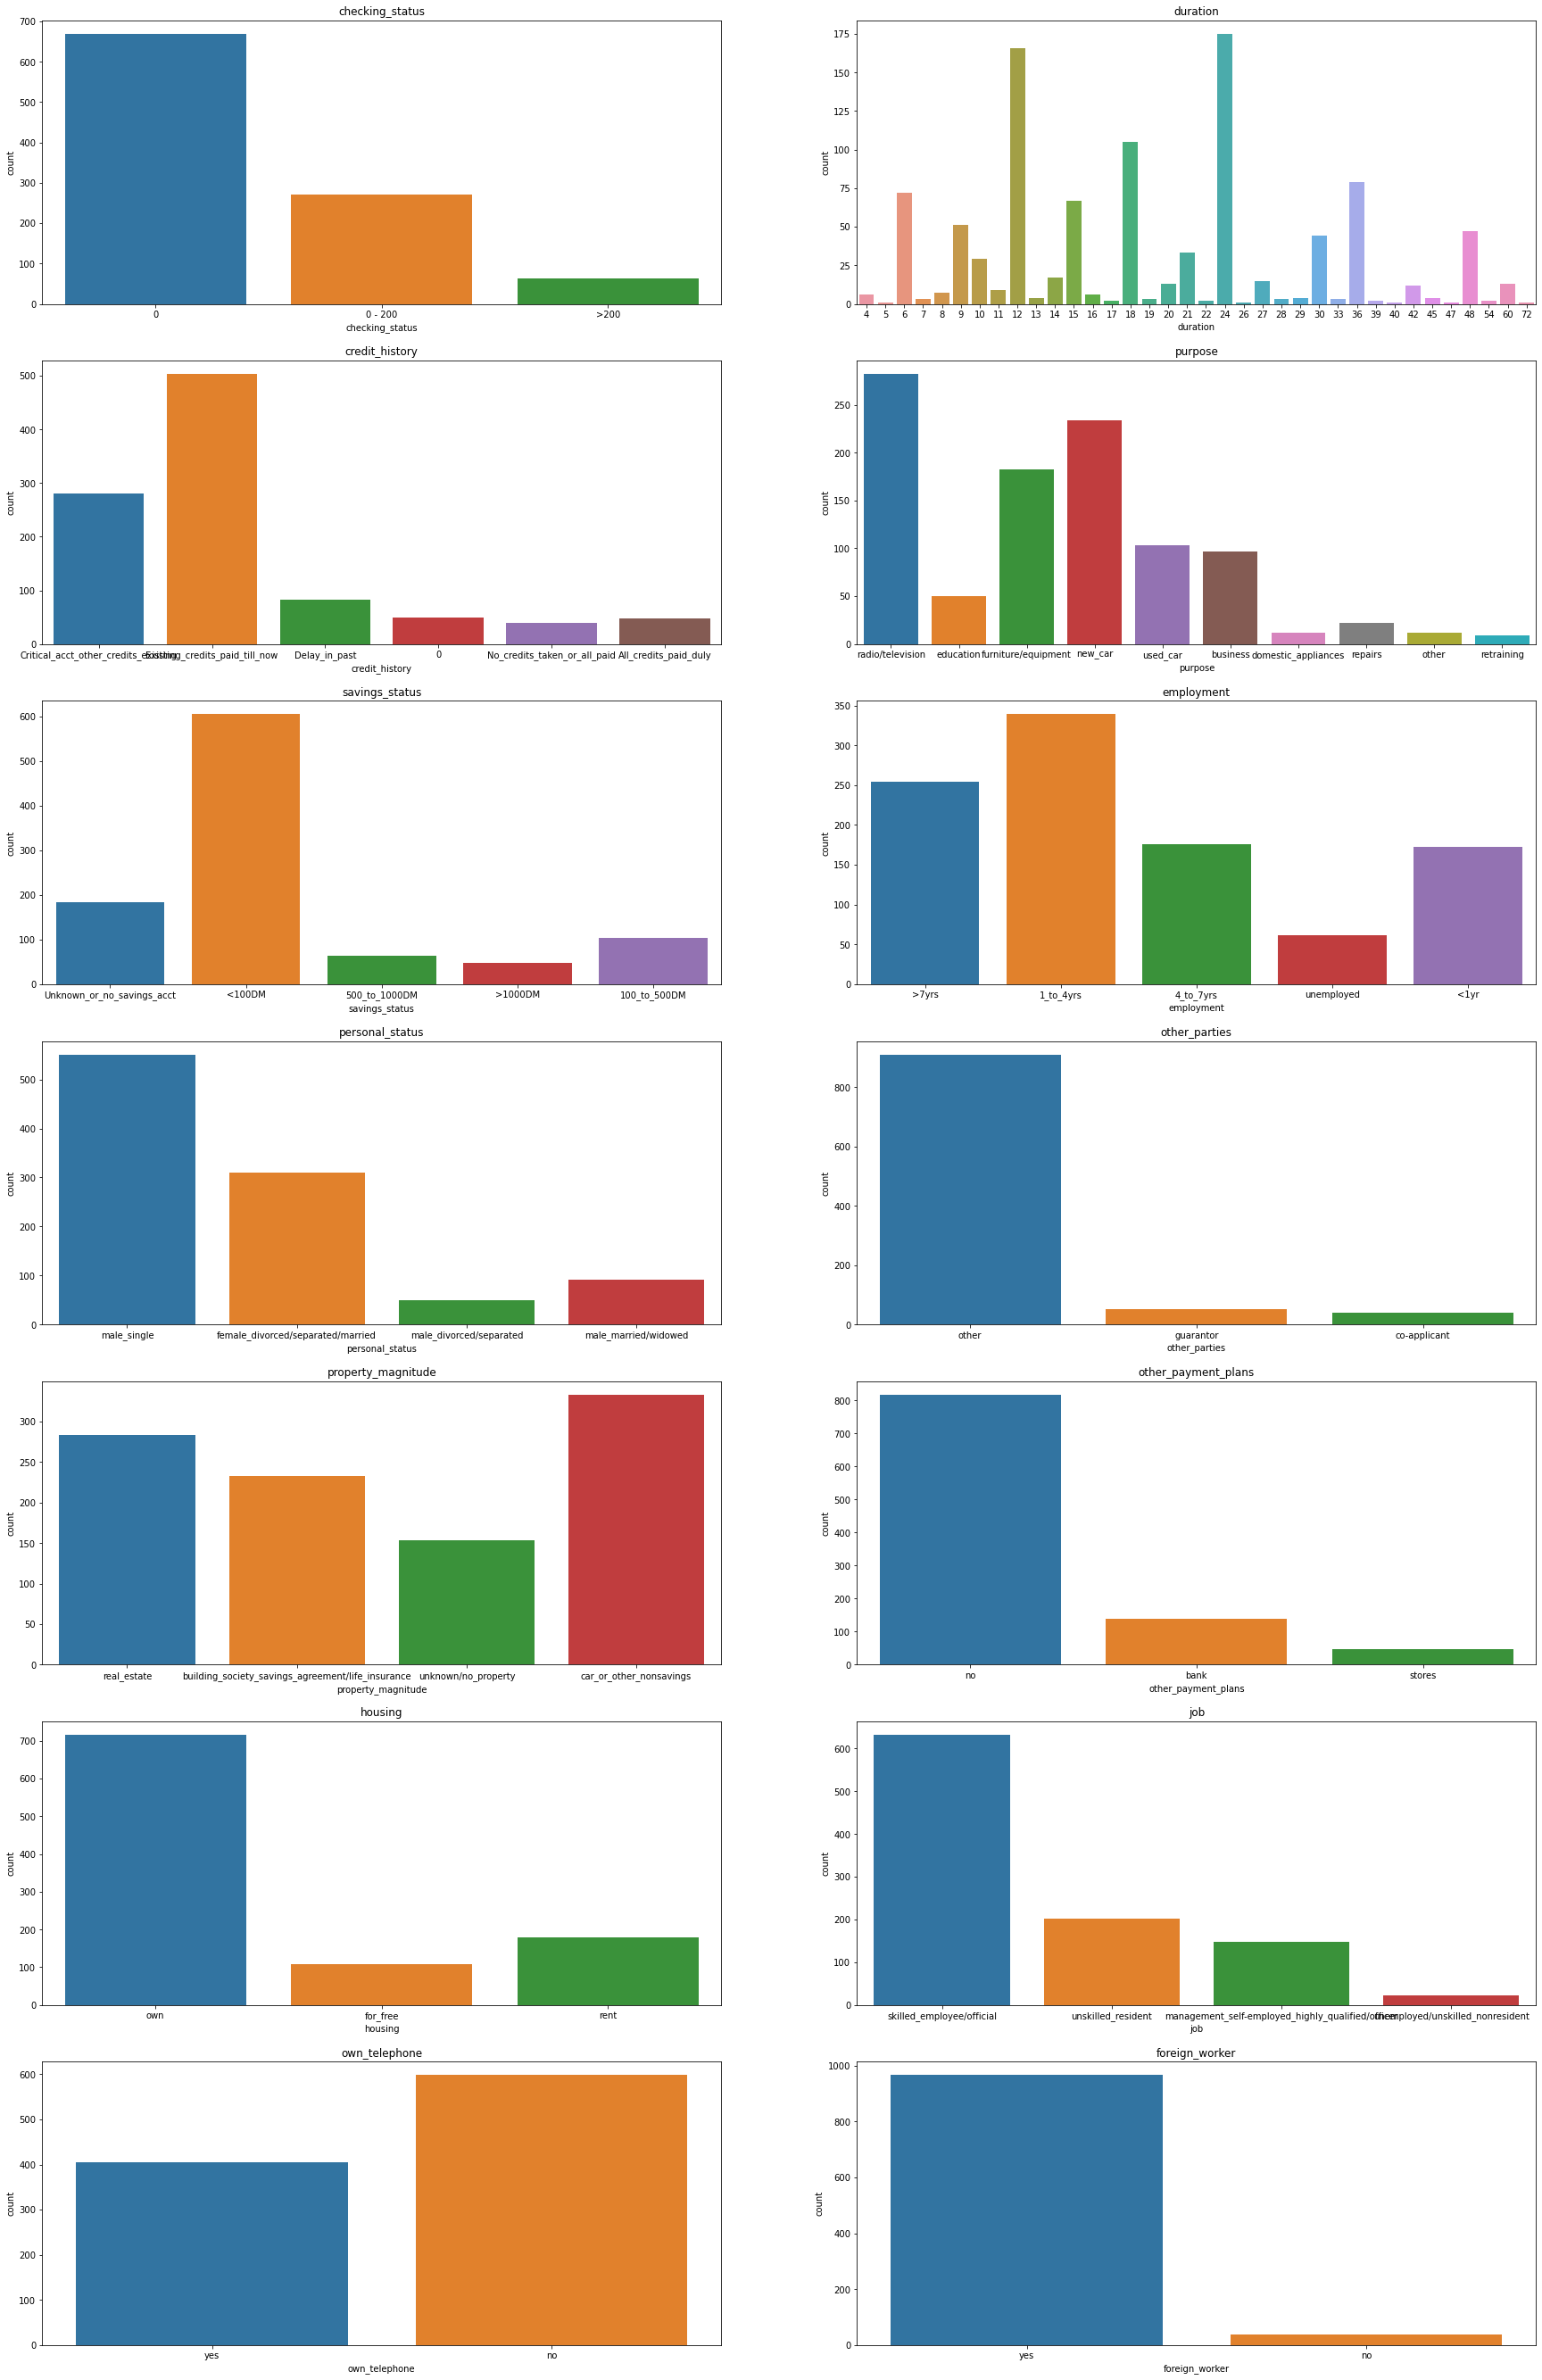

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

a = 13  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,90))

for feature in cat_df.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.countplot(cat_df[feature])
    c = c + 1

plt.show()


Most of the clients don't have any checking balance or saving balance <100 DM at the time when they applied for credit. Most of the loans are with duration 12 or 24 months.Almost half of the clients don't have defaulted loans (repaid all till the applying process). Majority of the applicants were single males between 20-36 years, skilled employees, foreign workers, owning their housing, not owning telephone(or most probably prefer not to say). The target class "accepted" is imbalanced, for around 70% of the applicants the result is 0 the rest 1 (not mentioned what these classes mean). Unfortunately, cannot analyze the data more, because I don't have info for the target class.

In [60]:
pd.crosstab(dataset['accepted'],dataset['job'])

job,management_self-employed_highly_qualified/officer,skilled_employee/official,unemployed/unskilled_nonresident,unskilled_resident
accepted,,,,
0,97,446,15,145
1,51,186,7,56


In [61]:
dataset.groupby(['accepted', 'credit_history']).size()

accepted  credit_history                      
0         0                                        41
          All_credits_paid_duly                    21
          Critical_acct_other_credits_existing    233
          Delay_in_past                            55
          Existing_credits_paid_till_now          339
          No_credits_taken_or_all_paid             14
1         0                                         9
          All_credits_paid_duly                    27
          Critical_acct_other_credits_existing     48
          Delay_in_past                            27
          Existing_credits_paid_till_now          164
          No_credits_taken_or_all_paid             25
dtype: int64

If target 0 means that the loan is accepted, I think that it's very alerting that around 23% of total loan application have been approved to the clients who have critical other existing credits, while less than 5% were not approved to the same category.

#### numeric features

In [62]:
num_df = dataset[numerical_features]

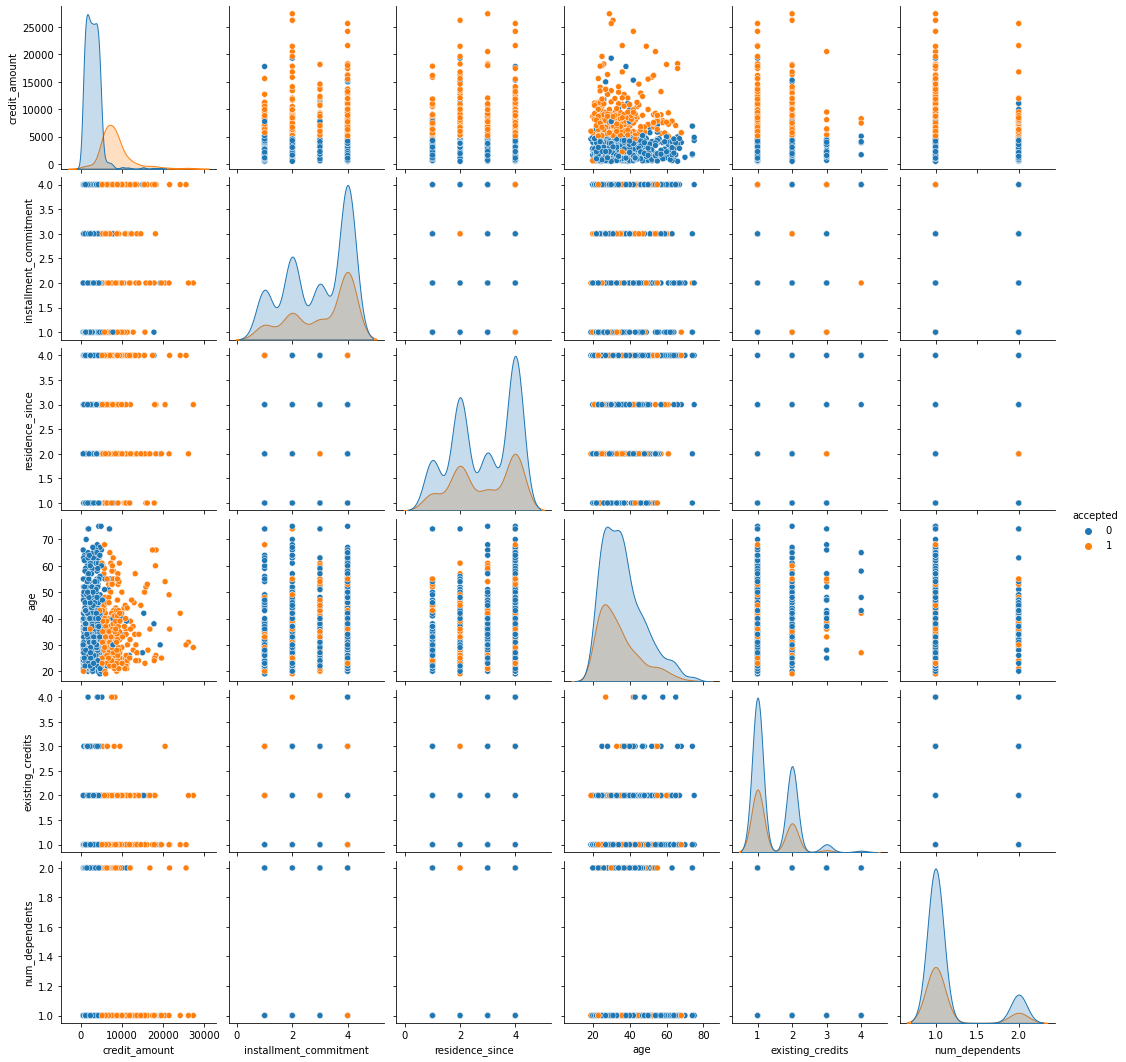

In [63]:
sns.pairplot(data=num_df,hue='accepted')

In [64]:
dataset['accepted'].value_counts()

# imbalanced target class

0    703
1    300
Name: accepted, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

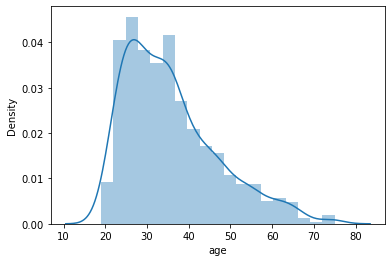

In [65]:
sns.distplot(dataset['age'], label='Duration')

right tailed distribution for the age, not quite normal

<AxesSubplot:xlabel='age-log', ylabel='Density'>

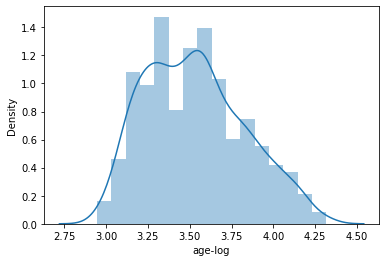

In [66]:
# Converting age to log in order to normalize a bit

dataset['age-log'] = np.log(dataset['age'])
sns.distplot(dataset['age-log'], label='Duration')

In [67]:
# Scaling the data

def minmax(frame):
    scaler = MinMaxScaler()
    frame[frame.columns] = scaler.fit_transform(frame[frame.columns])
    
    return frame

In [68]:
from sklearn.preprocessing import StandardScaler

minmax_scaler = StandardScaler() 
dataset[['duration', 'credit_amount', 'age']] = minmax_scaler.fit_transform(dataset[['duration', 'credit_amount', 'age']].values)
dataset[['duration','credit_amount','age']]

,duration,credit_amount,age
0,-1.246624,-0.307588,0.291792
1,2.280732,0.666623,-1.218176
2,-0.742716,-0.711924,1.180008
3,1.776824,-0.932305,0.824722
4,0.265100,1.236080,1.535295
...,...,...,...
998,-0.742716,-0.372308,-0.418781
999,0.769008,-0.083128,0.380614
1000,-0.742716,-0.933125,0.202970
1001,2.028778,0.174296,-1.129354


In [69]:
def encode(frame,column):
    
    frame[column]=frame[column].astype(str)
    le = LabelEncoder()
    encoded_df=frame.copy()
    for feature in encoded_df.loc[:, frame.columns != column].select_dtypes(include='O').columns:
        encoded_df[feature]=le.fit_transform(encoded_df[feature])
    
       
    return encoded_df
# Not used - Label Encoding

In [70]:
def one_hot_encoding(dataset, columns):
    ds_new = dataset.copy()
    data_dummies =  pd.get_dummies(dataset[columns])
    dataset_new = pd.concat([ds_new, data_dummies],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new


In [71]:
cat_df = dataset[categorical_features]

In [72]:
for cols in cat_df.columns:
    print(f'Number of unique values for: {cols}= {cat_df[cols].nunique()}')
    print(cat_df[cols].unique())
    print('----------------------------')

Number of unique values for: checking_status= 3
['0' '0 - 200' '>200']
----------------------------
Number of unique values for: duration= 36
[-1.24662389  2.28073224 -0.74271587  1.77682422  0.26510016  1.2729162
  0.76900818 -0.15482319 -0.49076186 -0.99466988 -0.91068521 -1.16263922
  3.28854828 -0.23880786  2.02877823 -0.82670054  0.51705417 -1.07865455
 -0.32279253  2.78464026 -0.57474653 -0.07083852  1.02096219  0.01314615
 -0.40677719 -1.41459323  2.19674757 -0.6587312   0.09713082  0.68502351
  0.60103884 -1.33060856  1.52487021  0.4330695   4.29636432  1.60885488]
----------------------------
Number of unique values for: credit_history= 6
['Critical_acct_other_credits_existing' 'Existing_credits_paid_till_now'
 'Delay_in_past' '0' 'No_credits_taken_or_all_paid'
 'All_credits_paid_duly']
----------------------------
Number of unique values for: purpose= 10
['radio/television' 'education' 'furniture/equipment' 'new_car' 'used_car'
 'business' 'domestic_appliances' 'repairs' 'oth

In [73]:
dataset_one_hot = one_hot_encoding(dataset, ['checking_status','other_parties','other_payment_plans','housing','job','own_telephone','foreign_worker'])
dataset_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 35 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   duration                                               1003 non-null   float64
 1   credit_history                                         1003 non-null   object 
 2   purpose                                                1003 non-null   object 
 3   credit_amount                                          1003 non-null   float64
 4   savings_status                                         1003 non-null   object 
 5   employment                                             1003 non-null   object 
 6   installment_commitment                                 1003 non-null   int64  
 7   personal_status                                        1003 non-null   object 
 8   residence_since                                 

In [74]:
dataset_one_hot

,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,...,housing_own,housing_rent,job_management_self-employed_highly_qualified/officer,job_skilled_employee/official,job_unemployed/unskilled_nonresident,job_unskilled_resident,own_telephone_no,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,-1.246624,Critical_acct_other_credits_existing,radio/television,-0.307588,Unknown_or_no_savings_acct,>7yrs,4,male_single,4,real_estate,...,1,0,0,1,0,0,0,1,0,1
1,2.280732,Existing_credits_paid_till_now,radio/television,0.666623,<100DM,1_to_4yrs,2,female_divorced/separated/married,2,real_estate,...,1,0,0,1,0,0,1,0,0,1
2,-0.742716,Critical_acct_other_credits_existing,education,-0.711924,<100DM,4_to_7yrs,2,male_single,3,real_estate,...,1,0,0,0,0,1,1,0,0,1
3,1.776824,Existing_credits_paid_till_now,furniture/equipment,-0.932305,<100DM,4_to_7yrs,2,male_single,4,building_society_savings_agreement/life_insurance,...,0,0,0,1,0,0,1,0,0,1
4,0.265100,Delay_in_past,new_car,1.236080,<100DM,1_to_4yrs,3,male_single,4,unknown/no_property,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,-0.742716,Existing_credits_paid_till_now,furniture/equipment,-0.372308,<100DM,4_to_7yrs,3,female_divorced/separated/married,4,real_estate,...,1,0,0,0,0,1,1,0,0,1
999,0.769008,Existing_credits_paid_till_now,used_car,-0.083128,<100DM,1_to_4yrs,4,male_divorced/separated,4,building_society_savings_agreement/life_insurance,...,1,0,1,0,0,0,0,1,0,1
1000,-0.742716,Existing_credits_paid_till_now,radio/television,-0.933125,<100DM,>7yrs,4,male_single,4,car_or_other_nonsavings,...,1,0,0,1,0,0,1,0,0,1
1001,2.028778,Existing_credits_paid_till_now,radio/television,0.174296,<100DM,1_to_4yrs,4,male_single,4,unknown/no_property,...,0,0,0,1,0,0,0,1,0,1


In [75]:
import category_encoders as ce

def target_encoding(dataset, columns, y):
    ds_new = dataset.copy()
    target_encoders = ce.TargetEncoder(cols = columns)
    data_target = target_encoders.fit_transform(dataset[columns], y).add_suffix('_tar_enc')
    dataset_new = pd.concat([ds_new, data_target],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new

In [76]:
cat = ['credit_history', 'purpose','savings_status','employment','personal_status','property_magnitude']
dataset_target = target_encoding(dataset_one_hot, cat, y=dataset_one_hot['accepted'])
dataset_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 35 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   duration                                               1003 non-null   float64
 1   credit_amount                                          1003 non-null   float64
 2   installment_commitment                                 1003 non-null   int64  
 3   residence_since                                        1003 non-null   int64  
 4   age                                                    1003 non-null   float64
 5   existing_credits                                       1003 non-null   int64  
 6   num_dependents                                         1003 non-null   int64  
 7   accepted                                               1003 non-null   int64  
 8   age-log                                         

In [77]:
dataset_target

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,accepted,age-log,checking_status_0,...,own_telephone_no,own_telephone_yes,foreign_worker_no,foreign_worker_yes,credit_history_tar_enc,purpose_tar_enc,savings_status_tar_enc,employment_tar_enc,personal_status_tar_enc,property_magnitude_tar_enc
0,-1.246624,-0.307588,4,4,0.291792,2,1,0,3.663562,1,...,0,1,0,1,0.170819,0.219858,0.173913,0.251969,0.264973,0.212014
1,2.280732,0.666623,2,2,-1.218176,1,1,1,3.091042,0,...,1,0,0,1,0.326044,0.219858,0.358678,0.306785,0.351613,0.212014
2,-0.742716,-0.711924,2,3,1.180008,1,2,0,3.891820,1,...,1,0,0,1,0.170819,0.440000,0.358678,0.221591,0.264973,0.212014
3,1.776824,-0.932305,2,4,0.824722,1,2,0,3.806662,1,...,1,0,0,1,0.326044,0.318681,0.358678,0.221591,0.264973,0.304721
4,0.265100,1.236080,3,4,1.535295,2,2,1,3.970292,1,...,1,0,0,1,0.329268,0.380342,0.358678,0.306785,0.264973,0.435065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,-0.742716,-0.372308,3,4,-0.418781,1,1,0,3.433987,1,...,1,0,0,1,0.326044,0.318681,0.358678,0.221591,0.351613,0.212014
999,0.769008,-0.083128,4,4,0.380614,1,1,0,3.688879,1,...,0,1,0,1,0.326044,0.165049,0.358678,0.306785,0.400000,0.304721
1000,-0.742716,-0.933125,4,4,0.202970,1,1,0,3.637586,1,...,1,0,0,1,0.326044,0.219858,0.358678,0.251969,0.264973,0.306306
1001,2.028778,0.174296,4,4,-1.129354,1,1,1,3.135494,1,...,0,1,0,1,0.326044,0.219858,0.358678,0.306785,0.264973,0.435065


# Modelling - Algorithm

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, auc
from sklearn.metrics import roc_curve, classification_report,confusion_matrix

y = dataset_target['accepted']
X = dataset_target.drop(columns='accepted')


X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.3, random_state = 1)

rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, y_train)
y_pred=rf_clf.predict(X_test)
rf_proba_le=rf_clf.predict_proba(X_test)[:,1]

rf_score=accuracy_score(y_test,y_pred)
rf_score

0.9534883720930233

In [79]:
#sorry, umorna sum vekje za finalni komentari (4 am nautro e), se nadevam gorenavedenite se dovolni :)